In [1]:
# !ls

In [2]:
!pip install pandas matplotlib

In [3]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import sys
plt.style.use('seaborn-whitegrid')
import numpy as np

In [146]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.7.5 (default, Nov  1 2019, 02:16:23) 
[Clang 11.0.0 (clang-1100.0.33.8)]
Pandas version 1.0.3
Matplotlib version 3.2.1


In [147]:
# !echo "time,date,temp" | cat - 20200401.CSV > 20200401_header.CSV

In [148]:
df = pd.read_csv('20200401.CSV', names=['time','date','temp'])

In [149]:
df.set_index("time")

,date,temp
time,,
11:30:23,04/01/2020,28.25
11:30:33,04/01/2020,28.25
11:30:43,04/01/2020,28.25
11:30:53,04/01/2020,28.00
11:31:03,04/01/2020,28.00
...,...,...
18:52:38,04/01/2020,32.75
18:52:48,04/01/2020,32.75
18:52:58,04/01/2020,32.75


In [150]:
df ['time'] = pd.to_datetime(df['time'])

In [151]:
df ['date'] = pd.to_datetime(df['date'])

In [152]:
df.dtypes

time    datetime64[ns]
date    datetime64[ns]
temp           float64
dtype: object

In [154]:
x = df.groupby([pd.Grouper(key='time',freq='1h')]).size().reset_index(name='count')

In [155]:
for row in x.itertuples(index=False):
    print(row,row.time)

Pandas(time=Timestamp('2020-04-01 11:00:00'), count=37) 2020-04-01 11:00:00
Pandas(time=Timestamp('2020-04-01 12:00:00'), count=0) 2020-04-01 12:00:00
Pandas(time=Timestamp('2020-04-01 13:00:00'), count=0) 2020-04-01 13:00:00
Pandas(time=Timestamp('2020-04-01 14:00:00'), count=262) 2020-04-01 14:00:00
Pandas(time=Timestamp('2020-04-01 15:00:00'), count=341) 2020-04-01 15:00:00
Pandas(time=Timestamp('2020-04-01 16:00:00'), count=354) 2020-04-01 16:00:00
Pandas(time=Timestamp('2020-04-01 17:00:00'), count=359) 2020-04-01 17:00:00
Pandas(time=Timestamp('2020-04-01 18:00:00'), count=319) 2020-04-01 18:00:00


In [156]:
%matplotlib inline
import matplotlib.pyplot as plt
# plt.rcParams['figure.dpi'] = 100
plt.rcParams["figure.figsize"] = (30, 5) # (w, h)

In [157]:
df.set_index('time')

,date,temp
time,,
2020-04-01 11:30:23,2020-04-01,28.25
2020-04-01 11:30:33,2020-04-01,28.25
2020-04-01 11:30:43,2020-04-01,28.25
2020-04-01 11:30:53,2020-04-01,28.00
2020-04-01 11:31:03,2020-04-01,28.00
...,...,...
2020-04-01 18:52:38,2020-04-01,32.75
2020-04-01 18:52:48,2020-04-01,32.75
2020-04-01 18:52:58,2020-04-01,32.75


In [158]:
df = df.set_index('time')

In [160]:
df2 = df.resample('5Min').median().reset_index()
df2.dropna(inplace=True)

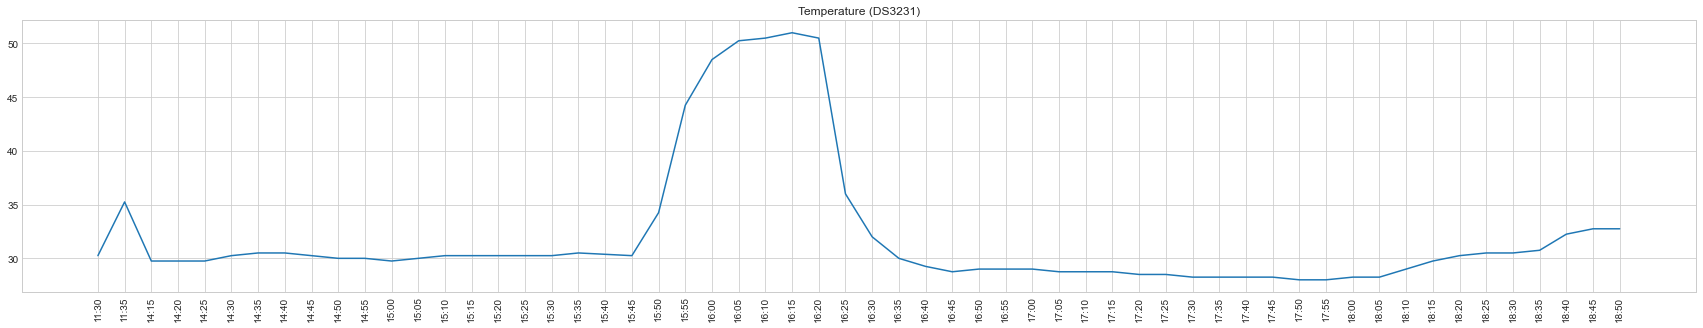

In [164]:
plt.title("Temperature (DS3231)")
plt.xticks(rotation=90)
plt.plot(df2.time.dt.strftime('%H:%M'), df2.temp)


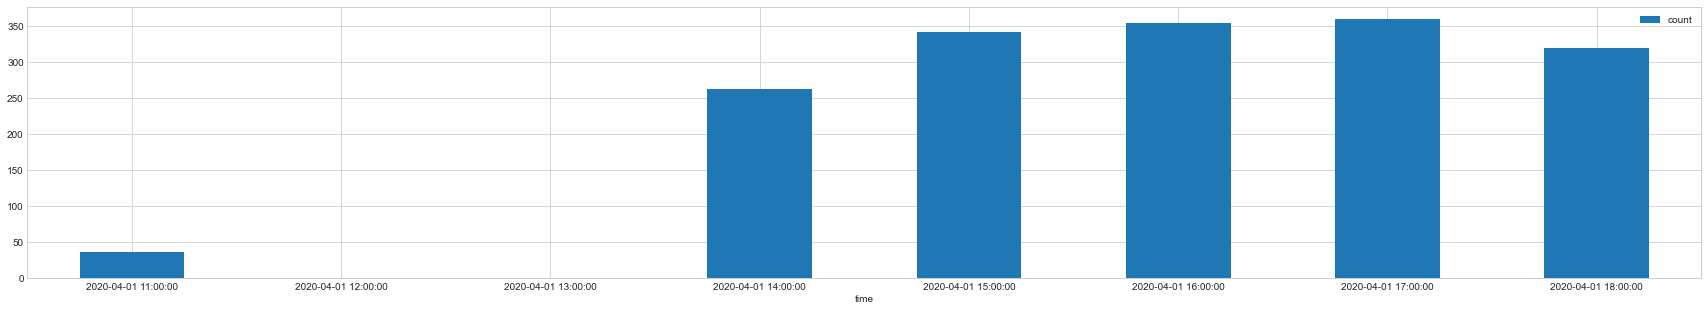

In [165]:
ax = x.plot.bar(x='time', y='count', rot=0)